LMS Exploration
<br/>**7. 뉴스 요약봇 만들기**

개발 환경
<br/>데이터 정보
<br/>데이터 탐색
<br/>텍스트 정규화
<br/>문서 요약

추상적 요약

텍스트 정규화
<br/>불용어 사전
<br/>BIG O
<br/>축약어 사전
<br/>텍스트 정규화 함수

데이터 전처리
<br/>훈련 샘플의 최대 길이
<br/>시작 토큰과 종료 토큰 추가
<br/>정수 시퀀스 샘플 셔플
<br/>train, test 데이터 분리
<br/>정수 인코딩
<br/>패딩

모델 구성
<br/>Encoder
<br/>Decoder
<br/>Attention Mechanism


모델 학습
<br/>인퍼런스 모델 구성
<br/>실제 결과와 요약문 비교

추출적 요약
<br/>결론
<br/>참고문헌

#개발 환경

In [ ]:
!pip install importlib

In [ ]:
!pip install importlib-metadata

In [ ]:
!pip install summa

In [ ]:
import nltk
import summa
import re
from bs4 import BeautifulSoup

NLTK(Natural Language Toolkit)는 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지다.
<br/>말뭉치, 토큰 생성, 형태소 분석, 품사 태깅의 기능을 사용한다.

summa는 텍스트 요약과 키워드 추출을 실행하는 TextRank 라이브러리이다.
<br/>TextRank는 구글의 페이지 랭크 알고리즘을 기반하여
<br/>텍스트로 이루어진 글에서 특정 단어가 다른 문장과 얼마만큼의 관계를 맺고 있는지를 계산하는 알고리즘이다.

re(regex)는 특정 문자 또는 문자열이 존재하는지나 어느 위치에 있는지와 같은 기능을 제공하는 정규표현식 라이브러리이다.

BeautifulSoup은 HTML 및 XML 파일에서 데이터를 Parsing 할 수 있는 라이브러리이다.<br/>Parsing이란 어떤 페이지(문서, html 등)에서 내가 원하는 데이터를 특정 패턴이나 순서로 추출해 가공하는 것이다.

In [ ]:
from importlib_metadata import version
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

importlib은 이미 임포트 해둔 모듈의 내용을 수정하고 싶을 때 사용한다.
<br/>임포트를 다시 하지 않고 모듈을 개발자의 환경에 맞게 수정한다.
<br/>코드 편집기에 재접속했을 때도 그 개발 환경 변경 사항이 유지된다.

importlib_metadata은 pip와 pkg_resources으로 패키지 메타데이터에 접근한다.
<br/>pkg_resources의 entry point API(프로그램의 진입점)와 metadata API 기능을 담당한다.
<br/>메타데이터는 package>-version-py version.egg-info 파일에 저장된다.





tensorflow는 구글이 개발한 오픈소스 소프트웨어 딥러닝 및 머신러닝 라이브러리이다.
<br/>수학 계산식과 데이터의 흐름을 노드와 엣지를 사용한 방향성 그래프, 데이터 플로우 그래프로 나타낸다.

keras는 Tensorflow위에서 동작하는 라이브러리이다.
<br/>keras는 high level API로서 딥러닝의 기본 연산을 한다.<br/>딥러닝 프레임워크 tensorflow, theano, CNTK를 backend로 사용하여 연산 작업을 수행한다.

keras의 Tokenizer는 문장으로부터 단어를 토큰화하고 숫자에 대응시키는 딕셔너리를 사용할 수 있게 한다.
<br/>pad_sequences는 특정 값을 채워서 데이터의 크기(shape)를 조정한다.

pandas는 행과 열로 이루어진 데이터 객체를 만들어 안정적으로 대용량의 데이터들을 처리한다.

numpy는 array 단위로 벡터와 행렬을 계산한다.

os(Operating System)는 운영체제에서 제공되는 여러 기능을 파이썬에서 수행한다. <br/>예를 들어, 파일 복사, 디렉터리 생성, 파일 목록을 구할 수 있다.

warnings는 실행시에 경고메시지를 지우는 역할을 한다.

In [ ]:
import time
from time import strftime
import sys
import collections

time은 epoch time(Unix time, POSIX time)을 다룬다.
<br/>epoch time(timestamp)은 UTC(GMT+0) 기준으로 1970년 1월 1일 0시 0분 0초부터의 경과 시간을 나타낸다.

time.strftime은 '연-월-일' 등 원하는 날짜/시간 포맷으로 출력한다.

sys는 파이썬 인터프리터가 제공하는 변수와 함수를 직접 제어한다.
<br/>명령 행에서 인수 전달(sys.argv), 강제로 스크립트 종료(sys.exit), 자신이 만든 모듈 불러와 사용(sys.path)하기 등의 기능이 있다.

collections는 자료구조 라이브러리이다.
<br/>스택과 큐 구현(deque), 등장 회수(counter) 세기 등의 기능이 있다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip freeze > '/content/drive/MyDrive/lms/library_version.txt'

In [ ]:
library_name = ['pandas=', 'numpy=', 'matplotlib=', 'nltk=', 'summa=', 'regex=', 'bs4=', 'mportlib-metadata=', 'tensorflow=',
                ]
library_version = []
f = open('/content/drive/MyDrive/lms/library_version.txt', 'r')
line = f.readline()
while True:
    line = f.readline()
    if not line:
      break
    for i in library_name:
      if i in line:
        library_version.append(line)

f.close()

import sys
print(sys.version)
print()
print(str(library_version).replace("[","").replace("]","").replace("'","").replace("\\n","").replace(",",""), end='')

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]

bs4==0.0.1 importlib-metadata==4.11.4 matplotlib==3.2.2 nltk==3.2.5 numpy==1.21.6 pandas==1.3.5 regex==2019.12.20 sklearn-pandas==1.8.0 summa==1.2.0 tensorflow==2.8.2+zzzcolab20220527125636

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Google Colab에서 할당된 GPU를 확인한다.
<br/>고용량 메모리 VM에 액세스한다.고용량 메모리 VM에 액세스한다.

#데이터 정보

[news_summary_more.csv](https://github.com/sunnysai12345/News_Summary)

데이터셋 제작자는 채팅 문맥을 분석하고 이해하는 일을 하고 있는 개발자다.
<br/>BeautifulSoup의 bs4 모듈을 이용해 웹크롤링을 했다.
<br/>뉴스 기사의 문법과 어휘는 좋은 통찰력을 준다고 믿는다.

2017년 Hindu(인도 제2위 영문 일간지), The Times of India(인도 최대 영문 일간지)
<br/>Guardian(영국 일간지)의 기사와 Inshorts(요약문)를 수집한 데이터이다.
<br/>Author_name, Headlines, Url of Article, Short text, Complete Article의 정보를 포함한다.
<br/>텍스트 요약(Text Summarization) 도구를 만드는 데 사용된다.

#데이터 탐색

In [ ]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

urllib.request은 다이제스트 인증, 리디렉션, 쿠키 등과 같은 URL이나 HTTP를 여는 데 도움이 되는 함수와 클래스를 정의한다.
<br/>웹 페이지 요청 및 데이터를 가져온다.

iso-8859-1는 아스키 코드로 인코딩한다.
<br/>아스키 코드는 영어를 표현하는 문자열 인코딩 방식이다.

In [ ]:
data.sample(10)

,headlines,text
84358,Where does every Ã¢ÂÂ¹100 deposited in the ba...,As credit-deposit ratio at May end was 72% acc...
38908,CAIT threatens nationwide agitation on Flipkar...,Traders' body Confederation of All India Trade...
25684,"Bride's kin abduct engineer at gunpoint, forci...",A railway engineer was allegedly abducted at g...
49090,"Video: Woman claims husband electrocuted her, ...",A video showing a woman in Mumbai's Khar claim...
51199,"SBI to hire over 9,500 to fill roles post merger",India's largest lender State Bank of India (SB...
97880,Upsetting when words like molestation used loo...,Actress Vidya Balan has said that it's upsetti...
3869,Good days are coming as PM Modi is about to go...,Following Prime Minister Narendra Modi's 95-mi...
48550,"I'm unhappy with present B'wood songs, music i...","Speaking about the changes in Indian cinema, l..."
86988,Jet Airways profit falls 91% due to high fuel ...,"India's second largest airline, Jet Airways, r..."
77658,"3 killed, 2 injured in shooting at Russian court",Three people standing trial in a Russian court...


text와 headlines 정보로 구성되어 있다.

In [ ]:
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98401


전체 98401개의 샘플이 있다.

In [ ]:
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())

headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280
text 열에서 중복을 배제한 유일한 샘플의 수 : 98360


In [ ]:
data.drop_duplicates(subset = ['headlines'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98280


데이터프레임의 drop_duplicates()를 사용하여 중복 샘플을 제거한다.

중복이 제거되면서 샘플 수가 98,280개로 줄어들었다.

In [ ]:
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


.isnull().sum()을 사용하여 데이터프레임에 Null 값이 있는지  확인한다.

#문서 요약

자연어 처리(NLP) 분야 중 하나인 문서 요약(text summarization)은
전체 문서에 포함된 글자와 문장들을 분석하여
<br/>요약문과 같이 글의 특징(feature)을 뽑아내는 기법이다.
<br/>크게 추상적 방식(abstractive approach)과 추출적 방식(extractive approach)으로 나뉜다.


추상적 요약과 추출적 요약에 의한 예측 결과와 실제 요약문을 비교하여
<br/>문서 요약 모델 간의 성능을 비교한다.

#추상적 요약

추상적 요약은 자연어 생성(Natural Language Generation, NLG)의 영역에 속하는 알고리즘이다.
<br/>대표적인 예로 seq2seq가 있다.

##텍스트 정규화

**텍스트 정규화(text normalization)**는 추가적으로 데이터를 처리하려고 자연어로 된 텍스트를 준비하는 과정이다.

**텍스트 정규화 기법**

**토큰화(tokenization)**
* word_tokenize(단어 토크나이저)
* sent_tokenize(문장 토크나이저)
* regexp_tokenize(정규 표현식 기반의 토크나이저)
* WordPunctTokenizer(이모티콘을 이용한 감성 분석)

**단어의 대·소문자 통일**
<br/>**불용어 제거**
<br/>**형태소 분석(stemming)**
* Porter(포터)
* Lancaster(랭커스터)
* lemmatize(원형 추출)

뉴스 텍스트 요약 도구에 맞는 텍스트 정규화 방법을 사용한다.

###불용어 사전

불용어는 큰 의미가 없다.
<br/>자주 등장하지만 텍스트 이해에 기여하는 바가 없기 때문이다.
<br/>

NLTK 라이브러리 자체 내에 정의된 영어 불용어 사전이 있다.


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
nltk_stopwords = stopwords.words('english')

In [ ]:
for i in range(len(nltk_stopwords)):
  if i % 17 == 0 and i != 0:
    print()
    print(nltk_stopwords[i-17:i], end='')
print() 
print(nltk_stopwords[-9:])  

print("\nnltk 정규화 사전 단어의 수: ", len(nltk_stopwords))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves']
['he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs']
['themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been']
['being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because']
['as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above']
['below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there']
['when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not']
['only', 'own', 'same', 'so', '

###BIG O

In [ ]:
nltk_stopwords = set(stopwords.words('english'))

불용어 사전 list를 set으로 바꾼다.

Python은 list보다 set으로 찾는 것이 훨씬 작업속도가 빠르다.
<br/>

In [ ]:
list_process = []
start_time = time.time()
for i in range(1, 100000):
    list_process.append(i)

list_dq = collections.deque(list_process)
list_d = list_dq.reverse()

print(time.time() - start_time)

0.014177799224853516


In [ ]:
set_process = set()
set_adder = list(range(1, 100000))
start_time = time.time()
set_process.update(set_adder)
set_dq = collections.deque(set_process)

set_d = set_dq.reverse()
print(time.time() - start_time)

0.004598855972290039


list에서 in 연산자를 사용하면 사실 상 for문을 한번 도는 것이기 때문에 선형 시간인 O(n)의 시간 복잡도를 가진다.
<br/>list에서 set으로 바꾸고 in 연산을 한다면 선형 시간 O(n)에서 O(1)로 작업 시간을 줄일 수 있다. 

Python의 set과 dict는 이진 트리가 아니라 해시 테이블로 구현되어 있어서 평균 O(1)의 시간이 걸린다.

Text 전처리 시에서만 호출하고 이미 상대적으로 문장 길이가 짧은 Summary 전처리할 때는 호출하지 않을 예정이다.

###축약어 사전

[스택오버플로우](https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python#)의 답변에 올라온 사용자 정의 축약어 사전을 저장한다.

In [ ]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("스택오버플로우 정규화 사전 단어의 수: ", len(contractions))

스택오버플로우 정규화 사전 단어의 수:  120


###텍스트 정규화 함수

In [ ]:
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower()
    sentence = BeautifulSoup(sentence, "lxml").text
    sentence = re.sub(r'\([^)]*\)', '', sentence) 
    sentence = re.sub('"','', sentence) 
    sentence = re.sub(r"'s\b","", sentence) 
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")])
    sentence = re.sub("[^a-zA-Z]", " ", sentence)
    sentence = re.sub('[m]{2,}', 'mm', sentence) 

    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

    stemmer = nltk.stem.SnowballStemmer('english')
    stemmer_words = [stemmer.stem(word) for word in tokens]
    return(' '.join(stemming_words))

데이터 전처리 함수 preprocess_sentence를 정의한다.

lower()는 텍스트를 소문자화한다.

BeautifulSoup에서  br/, a href = ... 등의 html 태그 제거를 한다.

**re**에서 괄호로 닫힌 문자열 (...), 쌍따옴표, 소유격을 제거하고
<br/>약어 정규화, 영어 외 문자(숫자, 특수문자 등) 공백으로 변환, m이 3개 이상이면 2개로 변경한다.

If 문에서 remove_stopwords=True면 불용어를 제거하고, False면 제거하지 않는다. 

SnowballStemmer는 Porter Stemmer의 에러를 수정한 어간 추출 알고리즘이다.
<br/>어간 추출은 단어를 어간 형태로 표현함으로써 단어의 개수를 줄이는 기법이다.
<br/>[Snowball 공식 홈페이지](https://snowballstem.org/algorithms/)에 정의된 어간 사전을 바탕으로 하여 어간을 추출한다.
<br/>예를 들어 see, saw, seen 는 모두 "see"로 표기를 통일한다.
<br/>Stemming을 통하여 단어 각각이 전하는 핵심 뜻을 간직하는 동시에, 복잡도를 낮춘다.

In [ ]:
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  

text:  everything bought great infact ordered twice third ordered wasfor mother father
summary: great way to start the day


전처리 이전과 이후의 문장을 비교한다.

추상적 요약을 하는 경우에는 text를 본문, headlines를 이미 요약된 데이터로 삼아서 모델을 학습한다.

In [ ]:
clean_text = []

for s in data['text']:
    clean_text.append(preprocess_sentence(s))

print("text 전처리 후 결과: ", clean_text[:5])

text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

text에 대해서 전처리 함수를 호출해 줄 때는, 불용어 제거를 수행한다.

In [ ]:
clean_headlines = []

for s in data['headlines']:
    clean_headlines.append(preprocess_sentence(s, False))

print("headlines 전처리 후 결과: ", clean_headlines[:5])

headlines 전처리 후 결과:  ['upgrad learner switches to career in ml al with salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam']


headlines에 대해서 전처리 함수를 호출해 줄 때는, 불용어 제거를 수행하지 않는다.

 텍스트 전처리의 과정을 거친 후에는 다시 한번 빈(empty) 샘플이 생겼는지 확인해본다.

In [ ]:
data['text'] = clean_text
data['headlines'] =  clean_headlines

data.replace('', np.nan, inplace=True)

데이터들을 데이터프레임에 저장하고
<br/>빈(empty) 값을 가진 샘플들이 있다면, Null 값을 가진 샘플로 대체한다.

In [ ]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [ ]:
data.dropna(axis=0, inplace=True)

.isnull().sum()을 사용해서 Null 값이 생겼는지 확인한다.<br/>Headlines 열에서 70개의 Null 값이 생겼다.<br/>이 샘플들을 제거한다.

In [ ]:
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98280


전체 샘플 수는 98280개이다.

seq2seq(Sequence-to-Sequence)는 입력된 시퀀스로부터 다른 도메인의 시퀀스를 출력하는 <br/>다양한 분야에서 사용되는 모델이다.

seq2seq의 입력 문장과 출력 문장으로
<br/>챗봇(Chatbot)의 질문과 대답
<br/>기계 번역(Machine Translation)의 원어와 번역어
<br/>내용 요약(Text Summarization)의 본문과 요약문
<br/>STT(Speech to Text)의 인간의 음성과 컴퓨터의 음성 인식
<br/>이라는 입력과 출력의 관계를 만들 수 있다.

seq2seq 훈련을 진행하기 위해서는 학습에 사용할 데이터의 크기를 결정하고
<br/>문장의 시작과 끝을 표시한다.

이를 위해 훈련 샘플의 최대 길이를 정하고
<br/>시작 토큰과 종료 토큰을 추가한다.

##데이터 전처리

###훈련 샘플의 최대 길이

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09916564916565
헤드라인의 최소 길이 : 1
헤드라인의 최대 길이 : 16
헤드라인의 평균 길이 : 9.294424094424095


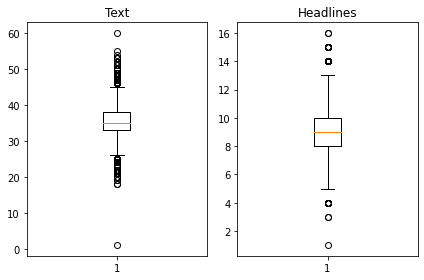

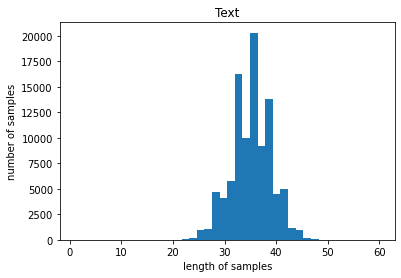

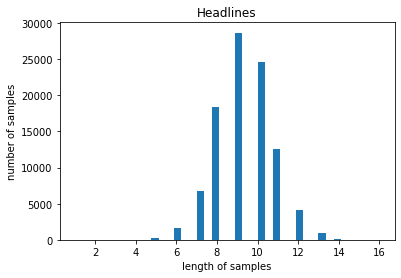

In [ ]:
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('헤드라인의 최소 길이 : {}'.format(np.min(headlines_len)))
print('헤드라인의 최대 길이 : {}'.format(np.max(headlines_len)))
print('헤드라인의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('Headlines')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

text와 headlines의 최소, 최대, 평균 길이를 구하고 또한 길이 분포를 시각화한다.

text의 경우 최소 길이가 1, 최대 길이가 100, 평균 길이는 38로
<br/>대체적으로는 100 내외의 길이를 가진다는 것을 파악한다.

headlines의 경우 최소 길이가 1, 최대 길이가 16, 평균 길이는 9로
<br/>대체적으로는 10 내외의 길이를 가진다는 것을 파악한다.

이로부터 text의 최대 길이와 headlines의 적절한 최대 길이를 임의로 정한다.

In [ ]:
text_max_len = 38
headlines_max_len = 10

이 길이를 선택했을 때, 얼마나 많은 샘플들을 자르지 않고 포함할 수 있는지 통계로 확인한다.

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [ ]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(headlines_max_len,  data['headlines'])

전체 샘플 중 길이가 38 이하인 샘플의 비율: 0.8164224664224664
전체 샘플 중 길이가 10 이하인 샘플의 비율: 0.8181013431013431


각각 38과 10으로 패딩을 하게 되면 해당 길이보다 긴 샘플들은 내용이 잘리게 되는데
<br/>약 18%의 샘플들이 제외된다.

In [ ]:
data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 65403


정해진 길이보다 길면 샘플을 제외한다.

###시작 토큰과 종료 토큰 추가

In [ ]:
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
5,rahat fateh ali khan denies getting notice for...,pakistani singer rahat fateh ali khan denied r...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice for...
9,cong wins ramgarh bypoll in rajasthan takes to...,congress candidate shafia zubair ramgarh assem...,sostoken cong wins ramgarh bypoll in rajasthan...,cong wins ramgarh bypoll in rajasthan takes to...
10,up cousins fed human excreta for friendship wi...,two minor cousins uttar pradesh gorakhpur alle...,sostoken up cousins fed human excreta for frie...,up cousins fed human excreta for friendship wi...


headlins 열로부터 만드는데
<br/>디코더의 입력에 해당되는 시작 토큰의 이름을 decoder_input,
<br/>디코더의 출력에 해당되는 종료 토큰의 이름을 decoder_target으로 한다.

In [ ]:
encoder_input = np.array(data['text']) 
decoder_input = np.array(data['decoder_input']) 
decoder_target = np.array(data['decoder_target']) 

인코더의 입력, 디코더의 입력과 레이블을 각각 Numpy 자료형으로 저장한다.

In [ ]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[ 6744 35745   687 ... 63323 31145 32576]


###정수 시퀀스 샘플 셔플

encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스를 만든다.

**np.random.shuffle**은 무작위 시퀀스를 두 배열의 인덱스로 사용하여 셔플 한다.
<br/>셔플 함수는 데이터의 순서를 무작위로 바꾸어 주는 함수이다.

In [ ]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의하여 샘플을 섞는다.

###train, test 데이터 분리

In [ ]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 13080


전체 데이터의 크기에서 0.2를 곱해서 테스트 데이터의 크기를 정의한다.

In [ ]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 52323
훈련 레이블의 개수 : 52323
테스트 데이터의 개수 : 13080
테스트 레이블의 개수 : 13080


이렇게 정의한 테스트 데이터의 개수를 이용해 전체 데이터를 8:2로 나눈다.

###정수 인코딩

각 단어에 고유한 정수를 맵핑하여 단어 집합(vocabulary)을 만든다.

In [ ]:
src_tokenizer = Tokenizer() 
src_tokenizer.fit_on_texts(encoder_input_train) 

토크나이저를 정의하고
<br/>입력된 text 데이터를 다루는 encoder의 단어집합을 생성한다.

In [ ]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) 
rare_cnt = 0 
total_freq = 0 
rare_freq = 0 

for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 : %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 57250
등장 빈도가 6번 이하인 희귀 단어의 수: 39382
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 : 17868
단어 집합에서 희귀 단어의 비율: 68.78951965065502
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.537824217845316


단어의 등장 빈도수가 threshold보다 작으면 훈련 데이터에서 제외한다.
<br/>if문에서 제외된 단어의 수를 카운트하고 빈도수를 저장한다.

등장 빈도가 threshold 값인 7회 미만인 단어들은 단어 집합에서 약 68%을 차지한다.
<br/>전체 훈련 데이터에서 등장 빈도는 4.54%가 된다.

In [ ]:
src_vocab = 17800
src_tokenizer = Tokenizer(num_words = src_vocab) 
src_tokenizer.fit_on_texts(encoder_input_train)

등장 빈도가 6회 이하인 단어를 제외한 단어 집합의 크기를 
<br/>17800개로 어림잡아 단어집합의 크기를 제한한다.

In [ ]:
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

print(encoder_input_train[:3])

[[522, 84, 3146, 3324, 2660, 7053, 5822, 49, 1, 1226, 105, 5574, 60, 910, 935, 28, 1117, 22, 1232, 8, 5822, 8689, 42, 1317, 157, 251, 1220, 42, 338, 661, 8, 3], [37, 24, 432, 24, 905, 44, 3291, 2868, 1313, 473, 3291, 323, 1268, 435, 43, 4848, 4315, 15574, 68, 73, 7, 426, 72, 97, 961, 1288, 1764, 5, 828, 20, 209], [1296, 111, 618, 5925, 1, 295, 282, 1227, 353, 299, 3949, 5925, 2296, 1154, 444, 6674, 6028, 2031, 1, 248, 8047, 111, 43, 5925, 1144, 120, 1200, 6029, 8, 1, 1296, 6799, 1353, 1149]]


texts_to_sequences()는 생성된 단어 집합에 기반하여 <br/>텍스트 시퀀스를 정수 시퀀스로 변환한다.

토크나이저를 정의하고
<br/>입력된 headlines 데이터를 다루는 decoder의 정수 인코딩 작업을 한다.

In [ ]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [ ]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) 
rare_cnt = 0 
total_freq = 0 
rare_freq = 0 

for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 25983
등장 빈도가 5번 이하인 희귀 단어의 수: 17593
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 8390
단어 집합에서 희귀 단어의 비율: 67.70965631374361
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.539126444112997


등장 빈도가 threshold 값인 7회 미만인 단어들은 단어 집합에서 약 68%을 차지한다.
<br/>전체 훈련 데이터에서 등장 빈도는 6.54%가 된다.

In [ ]:
tar_vocab = 8300
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 40, 274, 1141, 5, 1379, 4940], [1, 146, 100, 192, 919, 224, 211, 193, 2038, 52], [1, 47, 907, 1911, 7, 63, 301, 2592, 468, 7595], [1, 23, 156, 446, 3, 2450, 5254, 1186, 8, 1835], [1, 866, 30, 1379, 36, 3011, 772, 6, 584, 30, 5255]]
target
decoder  [[40, 274, 1141, 5, 1379, 4940, 2], [146, 100, 192, 919, 224, 211, 193, 2038, 52, 2], [47, 907, 1911, 7, 63, 301, 2592, 468, 7595, 2], [23, 156, 446, 3, 2450, 5254, 1186, 8, 1835, 2], [866, 30, 1379, 36, 3011, 772, 6, 584, 30, 5255, 2]]


등장 빈도가 6회 이하인 단어를 제외한 단어 집합의 크기를 
<br/>8300개로 어림잡아 단어집합의 크기를 제한한다.

texts_to_sequences()는 생성된 단어 집합에 기반하여 <br/>텍스트 시퀀스를 정수 시퀀스로 변환한다.

In [ ]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 1
훈련 데이터의 개수 : 52323
훈련 레이블의 개수 : 52323
테스트 데이터의 개수 : 13079
테스트 레이블의 개수 : 13079


전체 데이터에서 빈도수가 낮은 단어가 삭제되었다는 것은
<br/>빈도수가 낮은 단어만으로 구성되었던 샘플들은 이제 빈(empty) 샘플이 되었을 가능성이 있다.

요약문의 길이가 1인 경우의 인덱스를 각각 drop_train과 drop_test에 라는 변수에 저장한다.
<br/>이 샘플들을 모두 삭제한다.

###패딩

서로 다른 길이의 샘플들을 병렬 처리하기 위해 같은 길이로 맞춰주는 패딩 작업을 한다.

In [ ]:
text_max_len = 38
headlines_max_len = 10

훈련 샘플의 최대 길이로 패딩한다.
<br/>짧은 데이터는 뒤의 공간에 숫자 0을 넣어 최대 길이로 길이를 맞춘다.

In [ ]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')

post는 padding 방식을 문장 뒤쪽으로 하는 것이다.
<br/>반면 pre는 앞의 공간에 숫자 0을 넣어 최대 길이로 길이를 맞추는 것인데
<br/>RNN 모델에서는 pre 기법이 성능이 높게 나와 많이 쓰인다.

##모델 구성

###Encoder

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model


embedding_dim = 128
hidden_size = 256

encoder_inputs = Input(shape=(text_max_len,))

enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

모델은 Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed 레이어로 구성된다.

Input은 입력 데이터의 크기를 지정하는 레이어다.

LSTM은 SimpleRNN의 장기 의존성 문제를 해결하기 위해 등장한 레이어다.
<br/>장기의존성이란 입력과 출력 사이의 거리가 멀어질수록 연관 관계가 적어지는 문제이다.
<br/>LSTM은 이전의 특정 정보가 유의미할때까지 기억하고
<br/>필요 없다면 잊어버리며 현재의 정보와 합쳐 정확한 출력을 낸다. 

Embedding은 단어의 분산 표현을 구현하기 위한 레이어이다.
<br/>분포 가설(distribution hypothesis)이란 모든 단어를 고정 차원의 벡터로 표현할 때
<br/>유사한 맥락에서 나타나는 단어는 그 의미도 비슷하다라는 것이다.
<br/>이런 방식으로 얻어지는 단어 벡터를 단어의 분산 표현(distributed representation)이라고 한다.

Dense는 추출된 정보를 하나의 일렬로 정렬해서 원하는 차원으로 축소시키는 레이어다.

Concatenate는 부분 network의 tensor를 하나로 합치는 레이어다.

Timedistributed는 각 time에서 출력된 아웃풋을 내부에 구성한 레이어와 연결시켜주는 레이어다.

인코더 임베딩 벡터의 차원은 128, hidden state의 크기를 256으로 정의한다.
<br/>레이어로 임베딩 층 1개, LSTM 층 3개를 구성한다.

LSTM의 **Recurrent Dropout**은 dropout을 time step마다 해주어
<br/>일반적인 dropout와 같이 regularization을 하고 과적합을 방지한다.

###Decoder

In [ ]:
decoder_inputs = Input(shape=(None,))

dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

디코더의 임베딩 층과 LSTM을 구성한다.
<br/>initial_state의 인자값으로 인코더의 hidden state와 cell state의 값을 넣는다.

###Attention Mechanism

In [ ]:
from tensorflow.keras.layers import AdditiveAttention

attn_layer = AdditiveAttention(name='attention_layer')


attn_out = attn_layer([decoder_outputs, encoder_outputs])

decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 38)]         0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 38, 128)      2278400     ['input_3[0][0]']                
                                                                                                  
 lstm_4 (LSTM)                  [(None, 38, 256),    394240      ['embedding_2[0][0]']            
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                            

어텐션 함수 AdditiveAttention를 가져와서 어텐션 층을 만든다.
<br/>인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴한다.

Concatenate는 어텐션의 결과와 디코더의 hidden state들을 연결한다.

Dense 레이어와 Softmax 활성화 함수를 거쳐 디코더의 출력층을 구성한다.

##모델 학습

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
205/205 [==============================] - 19s 64ms/step - loss: 6.2698 - val_loss: 5.8445
Epoch 2/50
205/205 [==============================] - 12s 58ms/step - loss: 5.7594 - val_loss: 5.5488
Epoch 3/50
205/205 [==============================] - 12s 58ms/step - loss: 5.4644 - val_loss: 5.3089
Epoch 4/50
205/205 [==============================] - 12s 59ms/step - loss: 5.1990 - val_loss: 5.1128
Epoch 5/50
205/205 [==============================] - 12s 58ms/step - loss: 4.9586 - val_loss: 4.9263
Epoch 6/50
205/205 [==============================] - 12s 58ms/step - loss: 4.7474 - val_loss: 4.7837
Epoch 7/50
205/205 [==============================] - 12s 58ms/step - loss: 4.5661 - val_loss: 4.6849
Epoch 8/50
205/205 [==============================] - 12s 58ms/step - loss: 4.4087 - val_loss: 4.6074
Epoch 9/50
205/205 [==============================] - 12s 58ms/step - loss: 4.2676 - val_loss: 4.5348
Epoch 10/50
205/205 [==============================] - 12s 58ms/step - loss: 4.141

keras의 callbacks 함수 EarlyStopping은 검증 세트에서의 손실이 더 이상 감소하지 않으면 학습을 중단한다.
<br/>ModelCheckpoint는 모델을 학습시키는 동안 에포크마다 자동으로 저장한다.

RMSProp은 AdaGrad의 단점을 보완한 기법이다.
<br/>AdaGrad는 과거의 기울기를 제곱하여 더하는 방식으로 갱신량이 0이 되어 전혀 갱신되지 않는 일이 발생하게 된다.
<br/>반면 RMSProp은 과거의 기울기를 적게 반영하고 최신의 기울기를 많이 반영하는
<br/>지수이동평균(Exponential Moving Average, EMA)의 연산을 하여 AdaGrad의 문제점을 개선한다.

Sparse Categorical Crossentropy는 데이터 label이 정수의 형태로 제공되어 멀티클래스 분류에 사용되는 손실함수이다. 

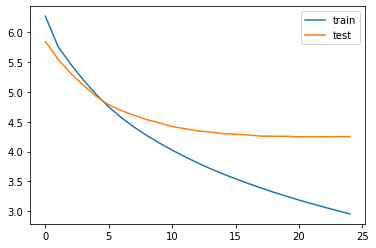

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

훈련 데이터의 손실과 검증 데이터의 손실이 줄어드는 과정을 시각화한다.

훈련 데이터셋의 학습은 실제 데이터셋의 부분 집합으로 오류가 감소한다.
<br/>테스트 데이터셋의 학습은 오류가 증가한다.
<br/>과적합 문제가 발생하지 않은 일반적인 모델 학습 과정이 나타난다.

##인퍼런스 모델 구성

딥러닝 프로세스는 분산처리를 기준으로 training과 inference로 나뉜다.
<br/>training은 모델을 만들기 위해 데이터를 이용하고, 로스를 줄이기 위해 가중치를 변경하는 반복작업이다.
<br/>inference는 이미 학습된 모델을 진행하면서 입력되는 사물을 빠른 시간에 판단하는 것으로 응답속도를 중요시한다.
<br/>사물을 판단하는 추론의 정확성은 모델학습과 관련된다.


seq2seq는 훈련할 때와 실제 동작할 때(인퍼런스 단계)의 방식이 다르므로
<br/>그에 맞게 모델 구성을 별개로 진행한다.

훈련 단계에서는 디코더의 입력부에 정답이 되는 문장 전체를 한꺼번에 넣지만
<br/> 정답 문장이 없는 인퍼런스 단계에서는 만들어야 할 문장의 길이만큼 디코더가 반복 구조로 동작한다. 

In [ ]:
src_index_to_word = src_tokenizer.index_word 
tar_word_to_index = tar_tokenizer.word_index 
tar_index_to_word = tar_tokenizer.index_word

src_index_to_word에서 원문 단어 집합에서 정수 -> 단어를 얻는다.

tar_word_to_index에서 요약 단어 집합에서 단어 -> 정수를 얻는다.

tar_index_to_word에서 요약 단어 집합에서 정수 -> 단어를 얻는다.

In [ ]:
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

인코더를 구성한다.
<br/>decoder_state_input은 이전 시점의 상태들을 저장하는 텐서이다.
<br/>문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용한다.
<br/>이는 뒤의 함수 decode_sequence()에 구현한다.
<br/>훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않는다.

In [ ]:
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

어텐션 메커니즘을 사용하는 출력층, 디코더를 구성한다.

In [ ]:
def decode_sequence(input_seq):
    
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: 

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        
        e_h, e_c = h, c

    return decoded_sentence

encoder_model.predict은 입력으로부터 인코더의 상태를 얻는다.
<br/>target_seq는 SOS에 해당하는 토큰을 생성한다.
<br/>stop_condition이 True가 될 때까지 루프를 반복한다.
<br/>sampled_token은 eos에 도달하거나 최대 길이를 넘으면 중단한다.
<br/> target_seq에서 길이가 1인 타겟 시퀀스를 업데이트한다.
<br/>e_h, e_c에서 상태를 업데이트한다.

##실제 결과와 요약문 비교

In [ ]:
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

원문(text 열)의 정수 시퀀스를 텍스트 시퀀스로 변환한다.

In [ ]:
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

요약문(headlines 열)의 정수 시퀀스를 텍스트 시퀀스로 변환한다.

In [ ]:
for i in range(0, 10):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : many people injured saturday five coaches passenger train derailed madhya pradesh district chief minister shivraj singh chouhan monitoring rescue operations given instructions administration chief minister office tweeted cause derailment yet known 
실제 요약 : injured after passenger train derails in madhya pradesh 
예측 요약 :  injured after train train derail in himachal


원문 : female convict mumbai byculla jail died women allegedly stripped inserted lathi private parts complaining missing eggs ration convict allegedly assaulted doctors found damaged lungs body fir accuses five constables jail officer murder 
실제 요약 : female inmate dies as force into private parts 
예측 요약 :  man who thrashed for harassing woman thrashed


원문 : winning uefa player year award real madrid croatian midfielder revealed former madrid teammate award contender cristiano ronaldo saying deserved award cristiano sent message congratulated told happy also said cannot wait meet revealed 
실제 요약 : you it ronaldo texted 

테스트 데이터 약 10개의 샘플에 대해서 실제 요약과 예측된 요약을 비교한다.

기존의 요약과는 다른 요약을 출력하면서도 원문의 내용을 담고 있는 의미 있는 요약들이 보인다.
<br/>심지어 일부 요약의 경우에는 원문에 없던 단어를 사용해서 요약을 한다.

원문에 가깝게 요약된 사례도 보이지만
<br/>문장 성분 순서가 어색하거나
<br/>문학 표현과 같은 비유를 사용해서 지나친 의역을 하거나
<br/>문맥상 원문과 의미가 전혀 다른 요약을 보이고 있는 사례도 있다. 

이러한 문제점을 해결하고 성능을 개선하는 방법은 다음과 같다.
* seq2seq와 어텐션의 자체의 조합 튜닝
* 빔 서치(beam search)
* 사전 훈련된 워드 임베딩(pre-trained word embedding)
* 트랜스포머(Transformer)

#추출적 요약

추출적 요약은 전통적인 머신 러닝 방식에 속하는 텍스트랭크(TextRank)와 같은 알고리즘이다.

Summa에서는 추출적 요약을 위한 모듈인 summarize를 제공한다.

In [ ]:
from summa.summarizer import summarize
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data2 = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [ ]:
for idx, (head, text) in enumerate(zip(data2['headlines'], data2['text'])):
    if idx == 10:
        break
    print("원문 :", text)
    print("실제 요약 :", head)
    print("예측 요약 :", summarize(text, ratio=0.35))
    print("\n")

원문 : Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.
실제 요약 : upGrad learner switches to career in ML & Al with 90% salary hike
예측 요약 : upGrad's Online Power Learning has powered 3 lakh+ careers.


원문 : Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.
실제 요약 : Delhi techie wins free food from Swiggy for one year on CRED
예측 요약 : Users get one CRED coin per rupee of bill pai

실제 요약과 예측 요약에서 공통되는 내용이 있으나
<br/>문장의 길이가 일정하지 않고
<br/>문장이 출력되지 않는 경우도 있다.

#결론

**추상적 요약**

사람이 문장을 직접 쓰는 듯한 자연스러움을 보여주지만
<br/>어떤 내용이 나올지 예측하기 어려워 신뢰성을 검증할 필요성이 있다.

기존의 요약과는 다른 요약을 출력하면서도 원문의 내용을 담고 있는 의미 있는 요약들이 보인다.
<br/>심지어 일부 요약의 경우에는 원문에 없던 단어를 사용해서 요약을 한다.
<br/>원문에 가깝게 요약된 사례도 보이지만
<br/>문장 성분 순서가 어색하거나
<br/>문학 표현과 같은 비유를 사용해서 지나친 의역을 하거나
<br/>문맥상 원문과 의미가 전혀 다른 요약을 보이고 있는 사례도 있다.

**추출적 요약**

원문의 단어만 쓰는 일관성있는 결과를 보장하지만
<br/>어휘나 표현력이 제한되어 있어 부자연스러운 문장이 출력될 수 있다.

실제 요약과 예측 요약에서 공통되는 내용이 있으나
<br/>문장의 길이가 일정하지 않고
<br/>문장이 출력되지 않는 경우도 있다.

#참고문헌

**논문**
<br/>[안신영, 박유미, 임은지, 최완, 딥러닝 분산처리 기술동향, 전자통신동향분석 31권 3호 (통권 159), 2016, p.131-141](https://ettrends.etri.re.kr/ettrends/159/0905002137/)
<br/><br/>
<br/>**단행본**
<br/>
드미트리 지노비에프, 모두의 데이터 과학 with 파이썬, 황준식 옮김, 길벗, 2017
<br/>[e-book](https://thebook.io/006914/)
<br/><br/>서지영, 딥러닝 파이토치 교과서, 길벗, 2022
<br/>[드롭아웃을 이용한 성능 최적화](https://thebook.io/080289/ch08/03/02/)
<br/><br/>유원준 외 1명, 딥러닝을 이용한 자연어 처리 입문, wikidocs, 2022
<br/>[불용어(Stopword)](https://wikidocs.net/22530)
<br/>[패딩(Padding)](https://wikidocs.net/83544)
<br/><br/>남재윤, 파이썬 코딩도장, 길벗, 2018
<br/>[날짜/시간 모듈 활용하기](https://uni2237.tistory.com/56)
<br/><br/>
<br/>**기사**
<br/>[AI 기반 뉴스 3줄 요약 서비스 개발기 (AI PLUS Tech Blog)](https://blog.est.ai/2021/06/news-summary/)<br/>
<br/><br/>**웹사이트**
<br/>[Python importlib과 모듈 리로드](https://jh-bk.tistory.com/29)

[Using importlib.metadata](https://docs.python.org/3/library/importlib.metadata.html)

[NLTK 자연어 처리 패키지](https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html)

[python urllib 핵심 기초 정리](https://han-py.tistory.com/320)

[뉴스 기사 데이터(news_summary_more.csv)](https://github.com/sunnysai12345/News_Summary)

[문자열 인코딩 개념](https://jinnify.tistory.com/74)

[파이썬 bs4.FeatureNotFound: Couldn't find a tree builder with the features you requested: lxml. Do you need to install a parser library?](https://hello-ming.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-bs4FeatureNotFound-Couldnt-find-a-tree-builder-with-the-features-you-requested-lxml-Do-you-need-to-install-a-parser-library)

[Python 'float' object has no attribute 'lower'](https://blog.naver.com/PostView.nhn?blogId=pica4star&logNo=221532459431&parentCategoryNo=&categoryNo=47&viewDate=&isShowPopularPosts=true&from=search)


[열 개씩 끊어 출력하기 – print 줄바꿈 하지 않기](https://gomguard.tistory.com/26)

[summa 1.2.0](https://pypi.org/project/summa/)

[파이썬 TextRank(텍스트랭크)란.. 간단하게 사용해보기](https://velog.io/@seolini43/%ED%8C%8C%EC%9D%B4%EC%8D%AC-TextRank%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%9E%AD%ED%81%AC%EB%9E%80..-%EA%B0%84%EB%8B%A8%ED%95%98%EA%B2%8C-%EA%B5%AC%ED%98%84%ED%95%B4%EB%B3%B4%EA%B8%B0)

[Python BeautifulSoup Library 사용법 및 예제](https://codetravel.tistory.com/22)

[파싱(parsing)](https://www.scienceall.com/%ED%8C%8C%EC%8B%B1parsing/)

[Stemming and Lemmatization](https://sg-data.tistory.com/6)

[데이터 전처리 & 워드클라우드 시각화 실습 (Python)](https://eunhyejung.github.io/data_analysis/2018/07/24/data-processing-studying-with-python.html)

[Python List와 Set에서의 in 연산자 성능 비교하기](https://kyleyj.tistory.com/56)

[Python 시간복잡도, 코드시간측정](https://hbj0209.tistory.com/29)

[파이썬의 time 모듈로 시간 데이터 다루기](https://www.daleseo.com/python-time/)


[Snowball Stemmer – NLP](https://www.geeksforgeeks.org/snowball-stemmer-nlp/)

[Python - List, Set, Dict 자료형에 따른 시간 복잡도(Big-O)](https://2dowon.netlify.app/python/data-type-big-o/)

[딥 러닝을 이용한 자연어 처리 입문 / 시퀀스-투-시퀀스(Sequence-to-Sequence, seq2seq)](https://wikidocs.net/24996)

[python 파이썬 랜덤함수(random)에 대해서](https://blockdmask.tistory.com/383)

[자연어 처리하기 1](https://codetorial.net/tensorflow/natural_language_processing_in_tensorflow_01.html)

[ML Tensorflow 와 Keras 간단 비교](https://wooono.tistory.com/77)

[Tensorflow와 Keras의 관계](https://89douner.tistory.com/279)

[케라스 콜백 함수. EarlyStopping. ModelCheckpoint](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=baek2sm&logNo=222013688414)

[Keras 기초 Input Layer](https://smalldatalab.tistory.com/4)

[12-2. RNN - LSTM(Long Short Term Memory) 레이어](https://childult-programmer.tistory.com/55)

[딥러닝 레이어에 대한 이해](https://meissa.tistory.com/m/64)

[Dense Layer란? Dense Layer 역할 및 기능 / 개념](https://koreapy.tistory.com/917?category=919111)

[RNN Tensorflow + Keras](https://yjjo.tistory.com/32)

[딥러닝) optimizer ( SGD , Momentum , AdaGrad , RMSProp, Adam )](https://amber-chaeeunk.tistory.com/23)

[딥러닝 손실 함수(loss function) 정리: MSE, MAE, binary/categorical/sparse categorical crossentropy](https://bskyvision.com/822)

[인공지능의 기초](https://goballe.tistory.com/9)